In [32]:
def run_summary(pathtorun,wandb_name):
    #imports
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    import matplotlib.pyplot as plt
    import pandas as pd,numpy as np
    #figure
    fig, axs = plt.subplots(1,1,figsize=(40,20))
    #read_results
    summary = (pathtorun+wandb_name).replace("mmeignin/embryon_classif/","")
    pf=pd.read_csv(summary+"/results.csv")
    #labels
    labels=list(pf['Class'].unique())
    #val and train sets
    df_val=pf[pf['step_label']=="val"]
    df_train=pf[pf['step_label']=="train"]
    
    #Get best_epoch
    val_per_epoch  = df_val['epoch'].value_counts()
    train_per_epoch = df_train['epoch'].value_counts()
    val_acc_list=[]
    train_acc_list=[]
    for i in range(0,val_per_epoch.shape[0]):
        # acc per epoch
        #validation
        val_acc = df_val[df_val['epoch']==i]['accs'].sum()
        val_acc_list.append(val_acc/val_per_epoch[i])
        #training
        train_acc = df_train[df_train['epoch']==i]['accs'].sum()
        train_acc_list.append(train_acc/train_per_epoch[i])
    best_epoch= np.argmax(val_acc_list)
    
    #Run Summary
    Summary_list=[]
    Summary_list.append(list(map(lambda n: chr(int(n)+65), sorted(labels))))
    Summary_list.append(f"Validation accuracy for epoch {best_epoch} is : {val_acc_list[best_epoch]}")
    Summary_list.append(f"Train accuracy for epoch {best_epoch} is : {train_acc_list[best_epoch]}")
    plt.suptitle(f'{Summary_list[0]}\n{Summary_list[1]}\n{Summary_list[2]}', fontsize=25)
    #Confusion Matrix
    axs.set_title(f"Confusion Matrix for validation Best Epoch: {best_epoch}",fontsize=18)
    cm=confusion_matrix(df_val['Class'][df_val['epoch']==best_epoch], df_val['preds'][df_val['epoch']==best_epoch],labels=labels) 
    ConfusionMatrixDisplay(cm).plot(ax=axs)
    return fig
    

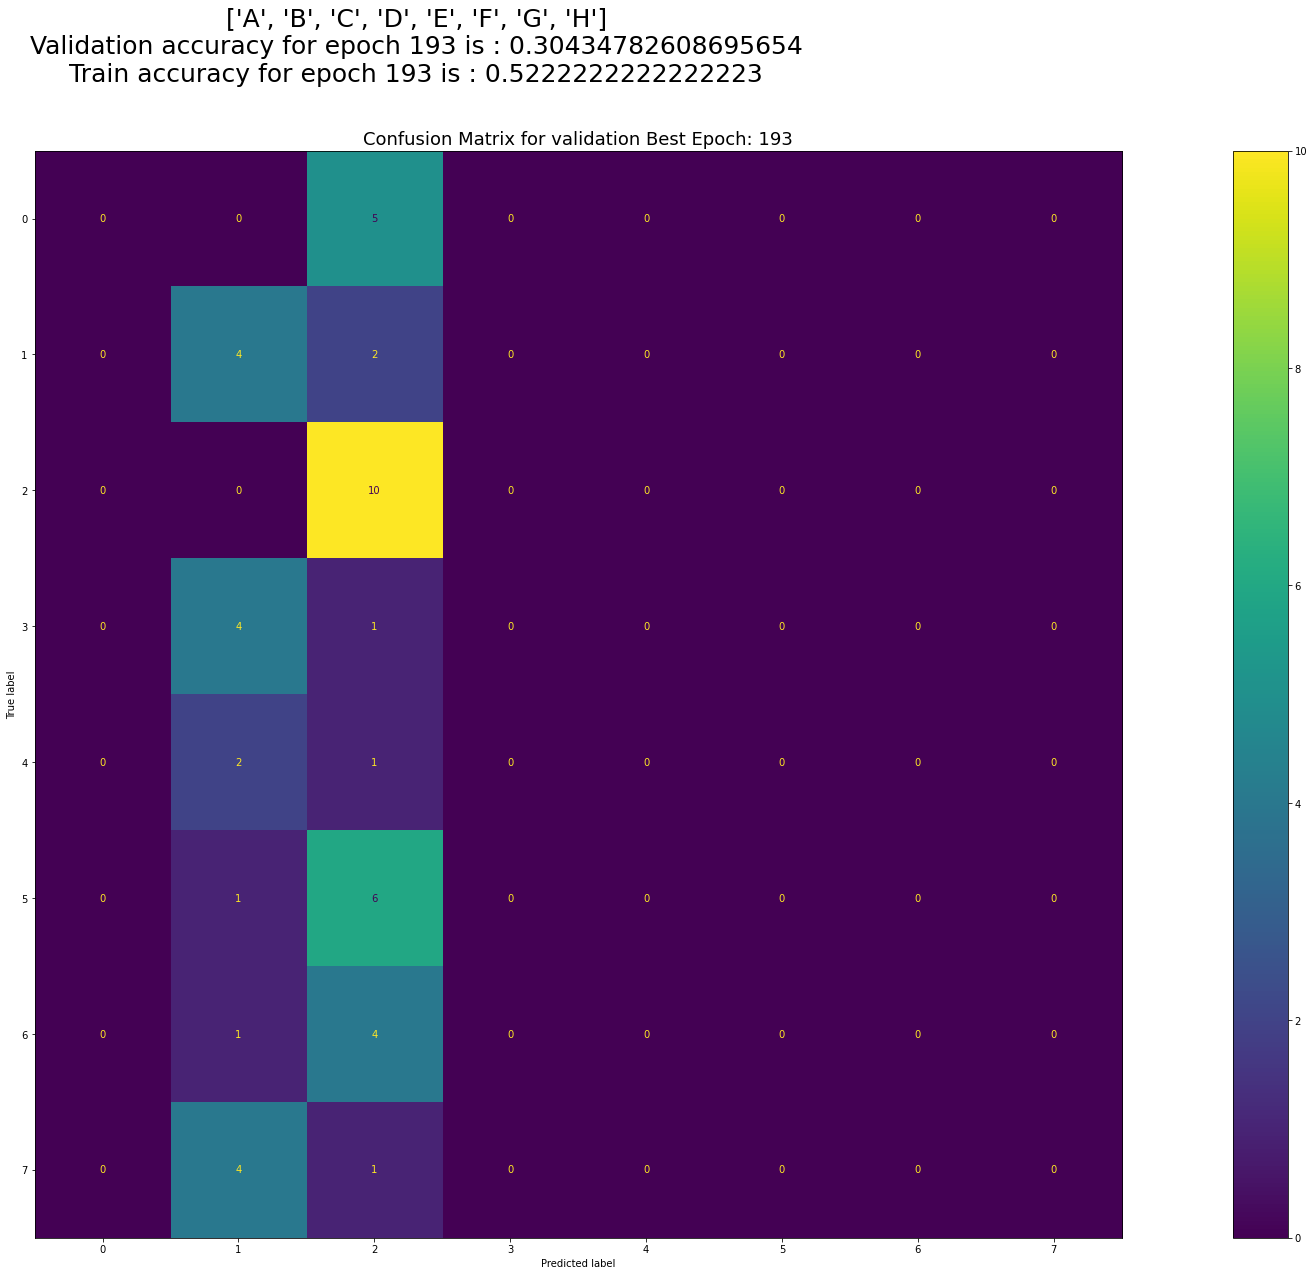

In [33]:
import os
path="/home/mmeignin/montages_reseau/home_maiage/mmeignin/Classification/EmbryonClassif/Models/EmbryonClassif/embryon_classif/"
wandb_name="mmeignin/embryon_classif/u9ua0n6d"
a=run_summary(path,wandb_name)
fig_path=os.getcwd()+"/"+wandb_name.split("/")[-1]
if not(os.path.isdir(fig_path)):
    os.mkdir(fig_path)
fig_name = fig_path +"/Run_summary_and_confusion_matrix.png"
a.savefig(fig_name,facecolor='white',bbox_inches="tight")

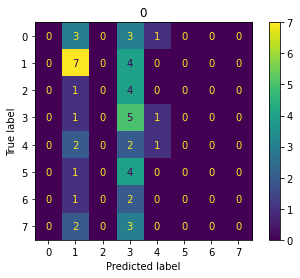

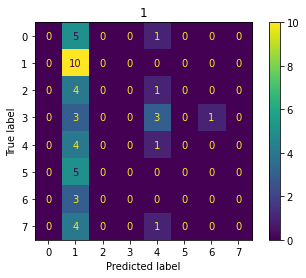

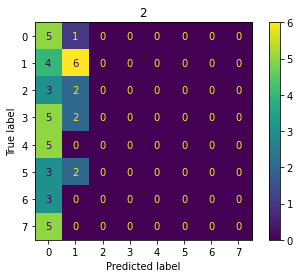

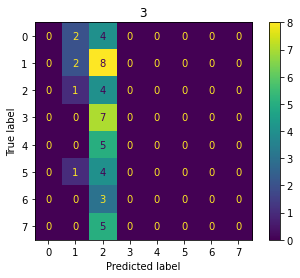

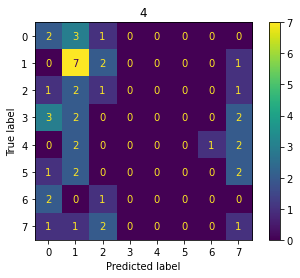

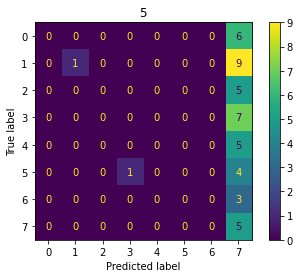

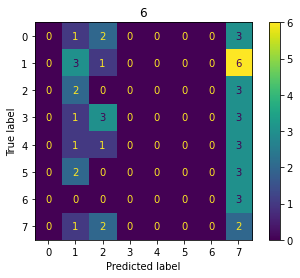

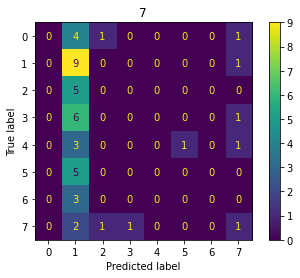

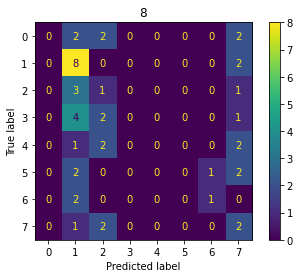

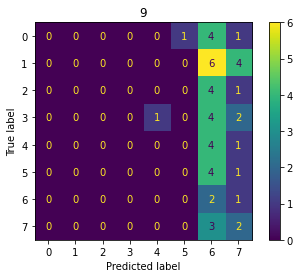

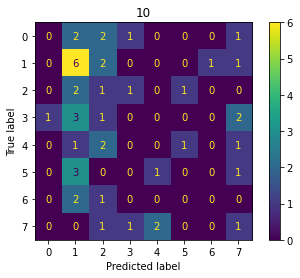

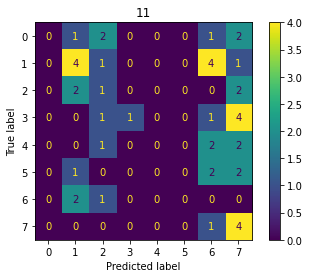

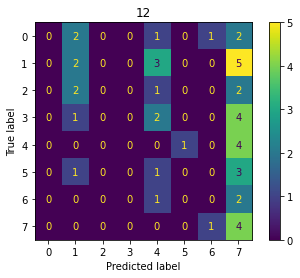

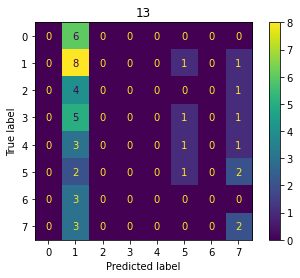

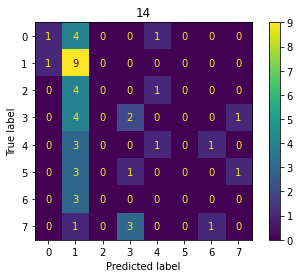

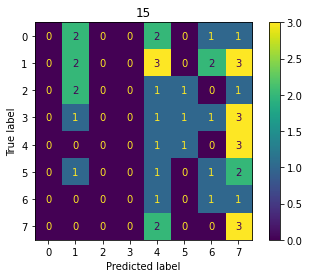

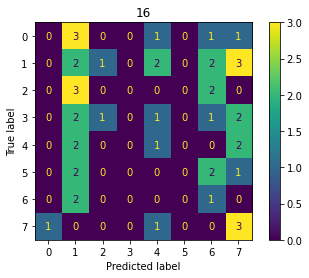

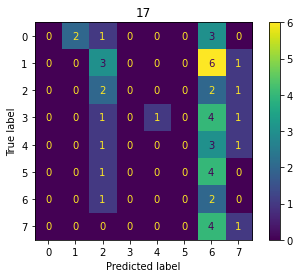

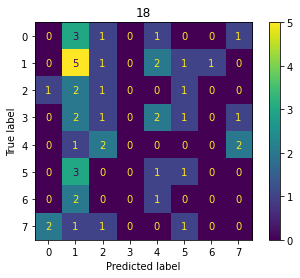

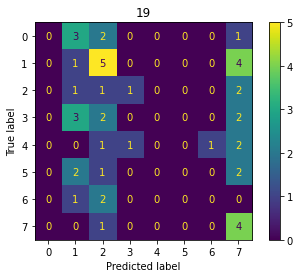

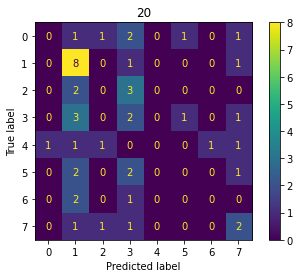

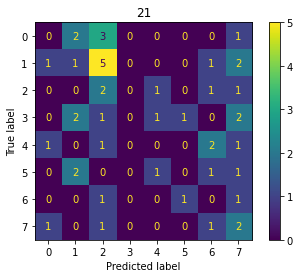

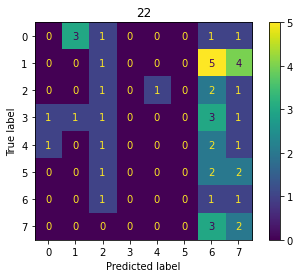

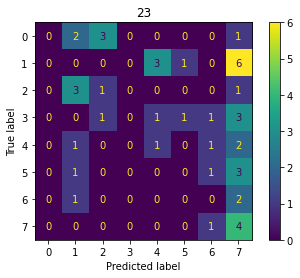

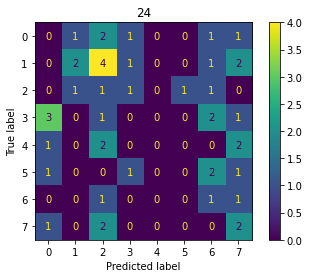

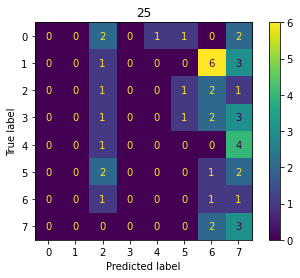

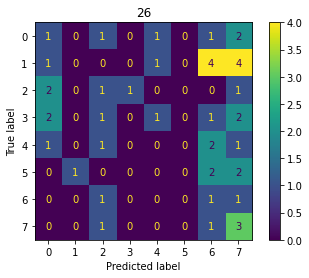

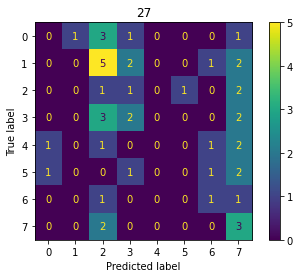

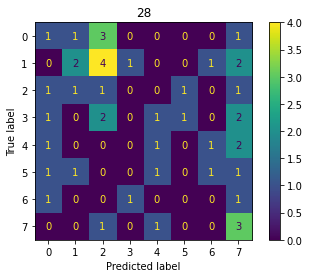

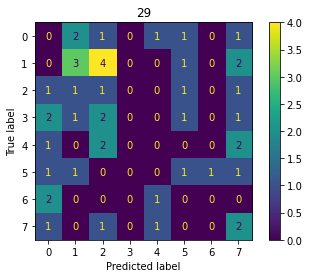

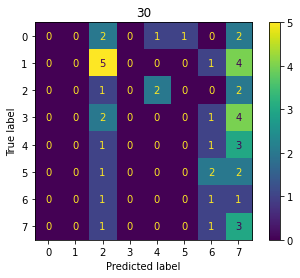

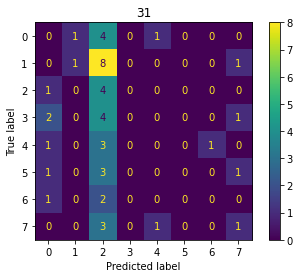

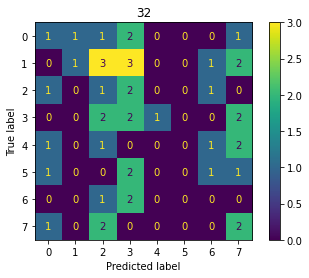

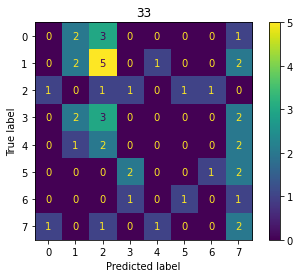

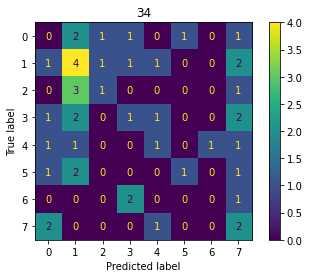

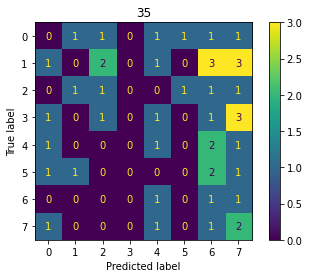

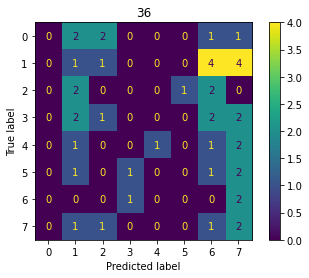

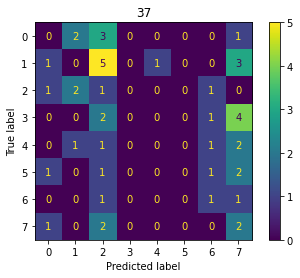

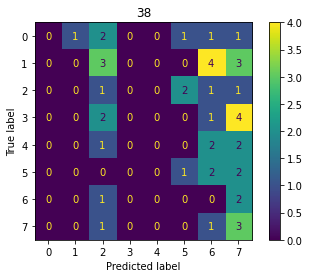

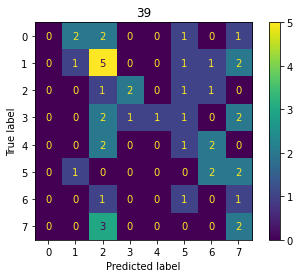

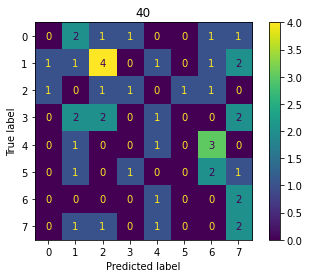

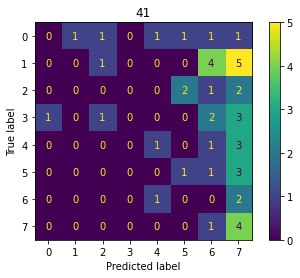

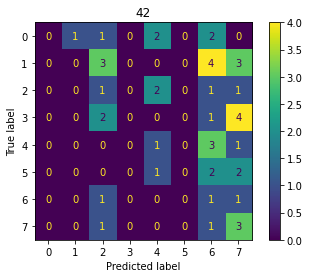

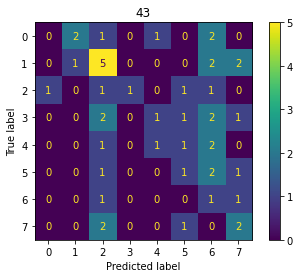

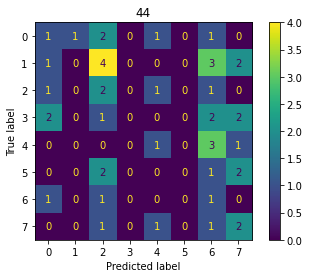

In [114]:
for i in df['epoch'].unique():
    cm=confusion_matrix(df['Class'][df['epoch']==i], df['preds'][df['epoch']==i],labels=labels)
    m_display = ConfusionMatrixDisplay(cm)
    m_display.plot()
    plt.title(i)
    plt.show()


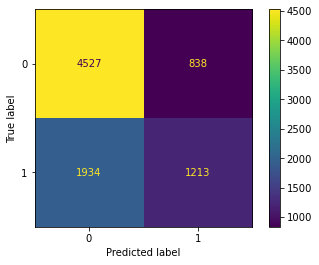

In [58]:
Class=df['Class']
Pred=df['preds']
cm=confusion_matrix(Class,Pred,labels=[0,1])
m_display = ConfusionMatrixDisplay(cm).plot()

In [35]:
import numpy as np
features =np.arange(1*300*512).reshape(1,300,512)
embedding = np.arange(1*300).reshape(1,300,1)
print(features.shape)
print(embedding.shape)
features = features + embedding
print(features)

(1, 300, 512)
(1, 300, 1)
[[[     0      1      2 ...    509    510    511]
  [   513    514    515 ...   1022   1023   1024]
  [  1026   1027   1028 ...   1535   1536   1537]
  ...
  [152361 152362 152363 ... 152870 152871 152872]
  [152874 152875 152876 ... 153383 153384 153385]
  [153387 153388 153389 ... 153896 153897 153898]]]
